# Using CV2's Haar Cascades to detect faces in images of people sitting in cars

In [2]:
import cv2
import os

In [3]:
# Load the Haar Cascade classifiers
face_cascades = [
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt_tree.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt.xml")
]


In [5]:

# Set the path to the input and output folders
input_folder = r'.\photos'
output_folder = r'.\detected_faces'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [6]:

# Loop over all images in the input folder
for filename in os.listdir(input_folder):
    # Load the image
    image_path = os.path.join(input_folder, filename)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using multiple classifiers
    faces = []
    for face_cascade in face_cascades:
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        if len(faces) > 0:
            break

    # Draw a rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the resulting image to the output folder
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, image)

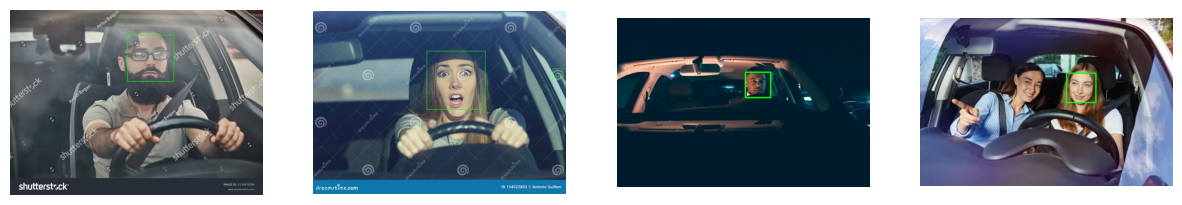

In [7]:
import random
from matplotlib import pyplot as plt

# Get a list of all image filenames in the folder
image_filenames = os.listdir(output_folder)

# Randomly pick 4 image filenames
selected_filenames = random.sample(image_filenames, 4)

# Load and display the selected images
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, filename in enumerate(selected_filenames):
    # Load the image
    image_path = os.path.join(output_folder, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()


# Therefore, it is apparent that the Haar Cascade detection works great and can be used to detect faces in our required use case